In [3]:
import numpy as np
from scipy.io import loadmat
from scipy.io import savemat
import matplotlib.pyplot as plt 

# Preparing and visualizing raw data
Note: the particular dataset used in this activity can be obtained here: https://www2.le.ac.uk/centres/csn/software

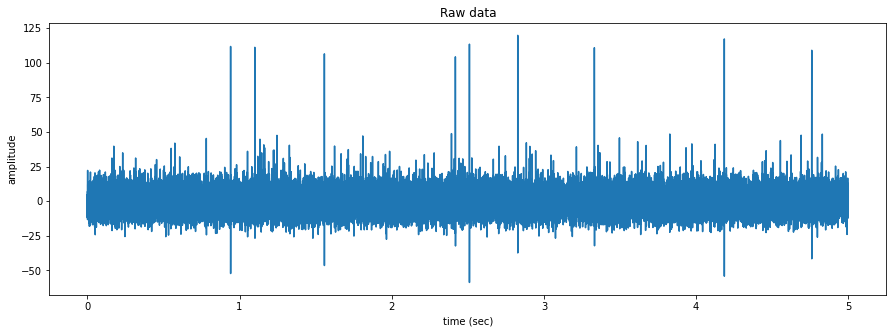

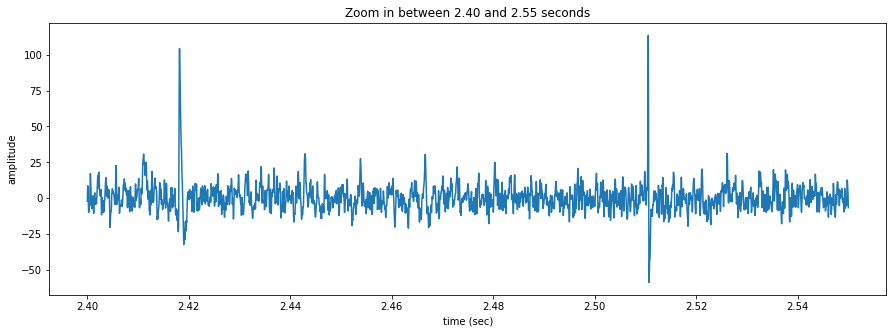

In [4]:
# load signal from file
file_in = loadmat("simulation_1.mat")

# uncomment this line for visibility
# print([key for key in file_in])

samplingInterval = file_in['samplingInterval'].item()/1000 # note: units in ms
startData = file_in['startData']
chan = file_in['chan']
data = file_in['data'].flatten()
spike_times = file_in['spike_times']
spike_class = file_in['spike_class']

# determine length of recording in seconds
rec_duration = data.shape[0]*samplingInterval

# length of sampled signal in seconds
samp_duration = 5
t = np.linspace(0,rec_duration,data.shape[0])
f_s = int(1/samplingInterval)

# display raw signal
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.plot(t[0:samp_duration*f_s], data[0:samp_duration*f_s])
ax.set_title('Raw data')
ax.set_xlabel('time (sec)')
ax.set_ylabel('amplitude')
plt.show()

# Zoom in for clarity
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.plot(t[round(2.4*f_s):round(2.55*f_s)], data[round(2.4*f_s):round(2.55*f_s)])
ax.set_title('Zoom in between 2.40 and 2.55 seconds')
ax.set_xlabel('time (sec)')
ax.set_ylabel('amplitude')
plt.show()

# Preprocessing raw data
Uncomment the following section after solving Question 1.1

In [5]:
# ******************************************************
# ****** Uncomment after solving Question 1.1 *********
# ******************************************************
# from scipy.signal import butter, lfilter
# 
# # preprocess raw data by bandpass filtering 300-6000 Hz range using a 2nd order IIR bandpass filter (Butterworth)
# b, a = butter(2, [300/(f_s/2), 6000/(f_s/2)], btype='band')
# filtered_data = lfilter(b, a, data)
# 
# # display filtered data
# fig = plt.figure(figsize=(15, 5))
# ax = fig.add_subplot(111)
# ax.plot(t[0:5*f_s], filtered_data[0:5*f_s])
# ax.set_title('Filtered data')
# ax.set_xlabel('time (sec)')
# ax.set_ylabel('amplitude')
# plt.show()
# 
# # Zoom in for clarity
# fig = plt.figure(figsize=(15, 5))
# ax = fig.add_subplot(111)
# ax.plot(t[round(2.4*f_s):round(2.55*f_s)], filtered_data[round(2.4*f_s):round(2.55*f_s)])
# ax.set_title('Zoom in between 2.40 and 2.55 seconds')
# ax.set_xlabel('time (sec)')
# ax.set_ylabel('amplitude')
# plt.show()

# Extracting spikes
Uncomment after solving Question 1.2

In [6]:
## Determines where spikes occur given an input signal. The sliding window length can be adjusted.
#
## Inputs ##
#  data: input waveform
#  w:    window length (default: 100)
#  thr:  spike threshold (default: 40)
## Outputs ##
#  spike_waves: windowed spike waveforms
#  spike_pos:   spike locations

# ******************************************************
# ****** Uncomment after solving Question 1.2 *********
# ******************************************************
# def SpikeSort(data, w = 100, thr = 40):
#     
#     
#     # determine where the data crosses specified threshold
#     thr_crossing = np.where(data>thr)[0]
#     thr_crossing = thr_crossing[thr_crossing>w]
#     
#     # initialize waveform/spike locations
#     spike_pos = []
#     spike_waves = np.zeros([1,2*w])
#     
#     # extract all spikes for now (i = indices of threshold crossings)
#     for i in thr_crossing:
#         
#         # capture the spike within the window
#         if i < data.shape[0] - (w+1):
#             
#             new_wave = data[i:i+w*2]
#         
#             # align waveform with peak sample
#             new_pos = np.argmax(new_wave)+i
#             new_wave = data[new_pos-(w):new_pos+(w)]
#             
#             # append windowed spike waveform
#             spike_pos = np.append(spike_pos, new_pos)
#             spike_waves = np.append(spike_waves, new_wave.reshape(1,2*w),axis=0)
#         
#     # remove any duplicate spikes before returning
#     diff_ind = np.where(np.diff(spike_pos)>1)[0]
#     spike_pos = spike_pos[diff_ind]
#     spike_waves = spike_waves[diff_ind]
#     
#     return spike_pos, spike_waves

In [7]:
## determine a threshold to detect spikes
# suggested from Quiroga et. al (2004) for automatic thresholding: 5*sigma_n
# Note: sigma_n is an estimate of noise since spikes account for a very small portion of the samples. 
# Therefore we can take the standard deviation of the entire signal.

# ******************************************************
# ****** Uncomment after solving Question 1.2 *********
# ******************************************************
# thr = 5*np.std(filtered_data)
# 
# pos, waves = SpikeSort(filtered_data,40,thr)
# 
# # plot the extracted spikes
# fig = plt.figure(figsize=(15, 5))
# ax = fig.add_subplot(111)
# for i in range(waves.shape[1]):
#     ax.plot(waves[i, :])

# Performing PCA to reduce dimensionality

In [8]:
# number of PCA components can be specified. not recommended changing to a value lower than 3.

# ******************************************************
# ******** TODO: Fill in the missing lines!!  **********
# ******************************************************

# ******************************************************
# *** TODO: Try different values for num_components  ***
# ******************************************************
num_components = ;
U,s,VT = 
pca = 

SyntaxError: invalid syntax (<ipython-input-8-f5ea9b6d0f00>, line 10)

# Clustering spikes with similar characteristics

In [ ]:
# k-means algorithm modified from Activity 10 of this semester
def kMeans(X, K, maxIters = 80, plot_progress = None):

    centroids = X[np.random.choice(len(X), K)]
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([(x_i-y_k)@(x_i-y_k) for y_k in centroids]) for x_i in X])
        # Update centroids step 
        centroids = []
        for k in range(K):
            if (C == k).any():
                centroids.append( X[C == k].mean(axis = 0) )
            else: # if there are no data points assigned to this certain centroid
                centroids.append( X[np.random.choice(len(X))] )
        if plot_progress != None: plot_progress(X, C, np.array(centroids))
    return np.array(centroids) , C

In [ ]:
# group data into K clusters
# ******************************************************
# ******** TODO: Try different values for K  ***********
# ******************************************************
K = 3
centroids, C = kMeans(waves, K)

# plot clustered data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(pca[:,0],pca[:,1],c=C)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')

# plot clustered (average) waveforms
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.set_xlabel('time (ms)')
ax.set_ylabel('Amplitude')
t = np.linspace(0,waves.shape[1]/f_s,waves.shape[1])*1000 # Note: units from s -> ms
for i in range(K):
    avg_wave = waves[C==i,:].mean(axis=0)
    std_wave = waves[C==i,:].std(axis=0)
    ax.plot(t,avg_wave)
    